In [ ]:
pip install quandl

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import sys
import math
import quandl

In [ ]:
# loading dataset 

quandl.ApiConfig.api_key = "3E_rjyzZL4sBBarx9KFh"
df = quandl.get("WIKI/AAPL")
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9400 entries, 1980-12-12 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         9400 non-null   float64
 1   High         9400 non-null   float64
 2   Low          9400 non-null   float64
 3   Close        9400 non-null   float64
 4   Volume       9400 non-null   float64
 5   Ex-Dividend  9400 non-null   float64
 6   Split Ratio  9400 non-null   float64
 7   Adj. Open    9400 non-null   float64
 8   Adj. High    9400 non-null   float64
 9   Adj. Low     9400 non-null   float64
 10  Adj. Close   9400 non-null   float64
 11  Adj. Volume  9400 non-null   float64
dtypes: float64(12)
memory usage: 954.7 KB


In [ ]:
# creating new features

df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/ df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] *100.0
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_Change
Date,,,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0,0.417391,0.000000
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0,0.477064,-0.474799
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0,0.475248,-0.473000
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0,0.502513,0.000000
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0,0.450620,0.000000


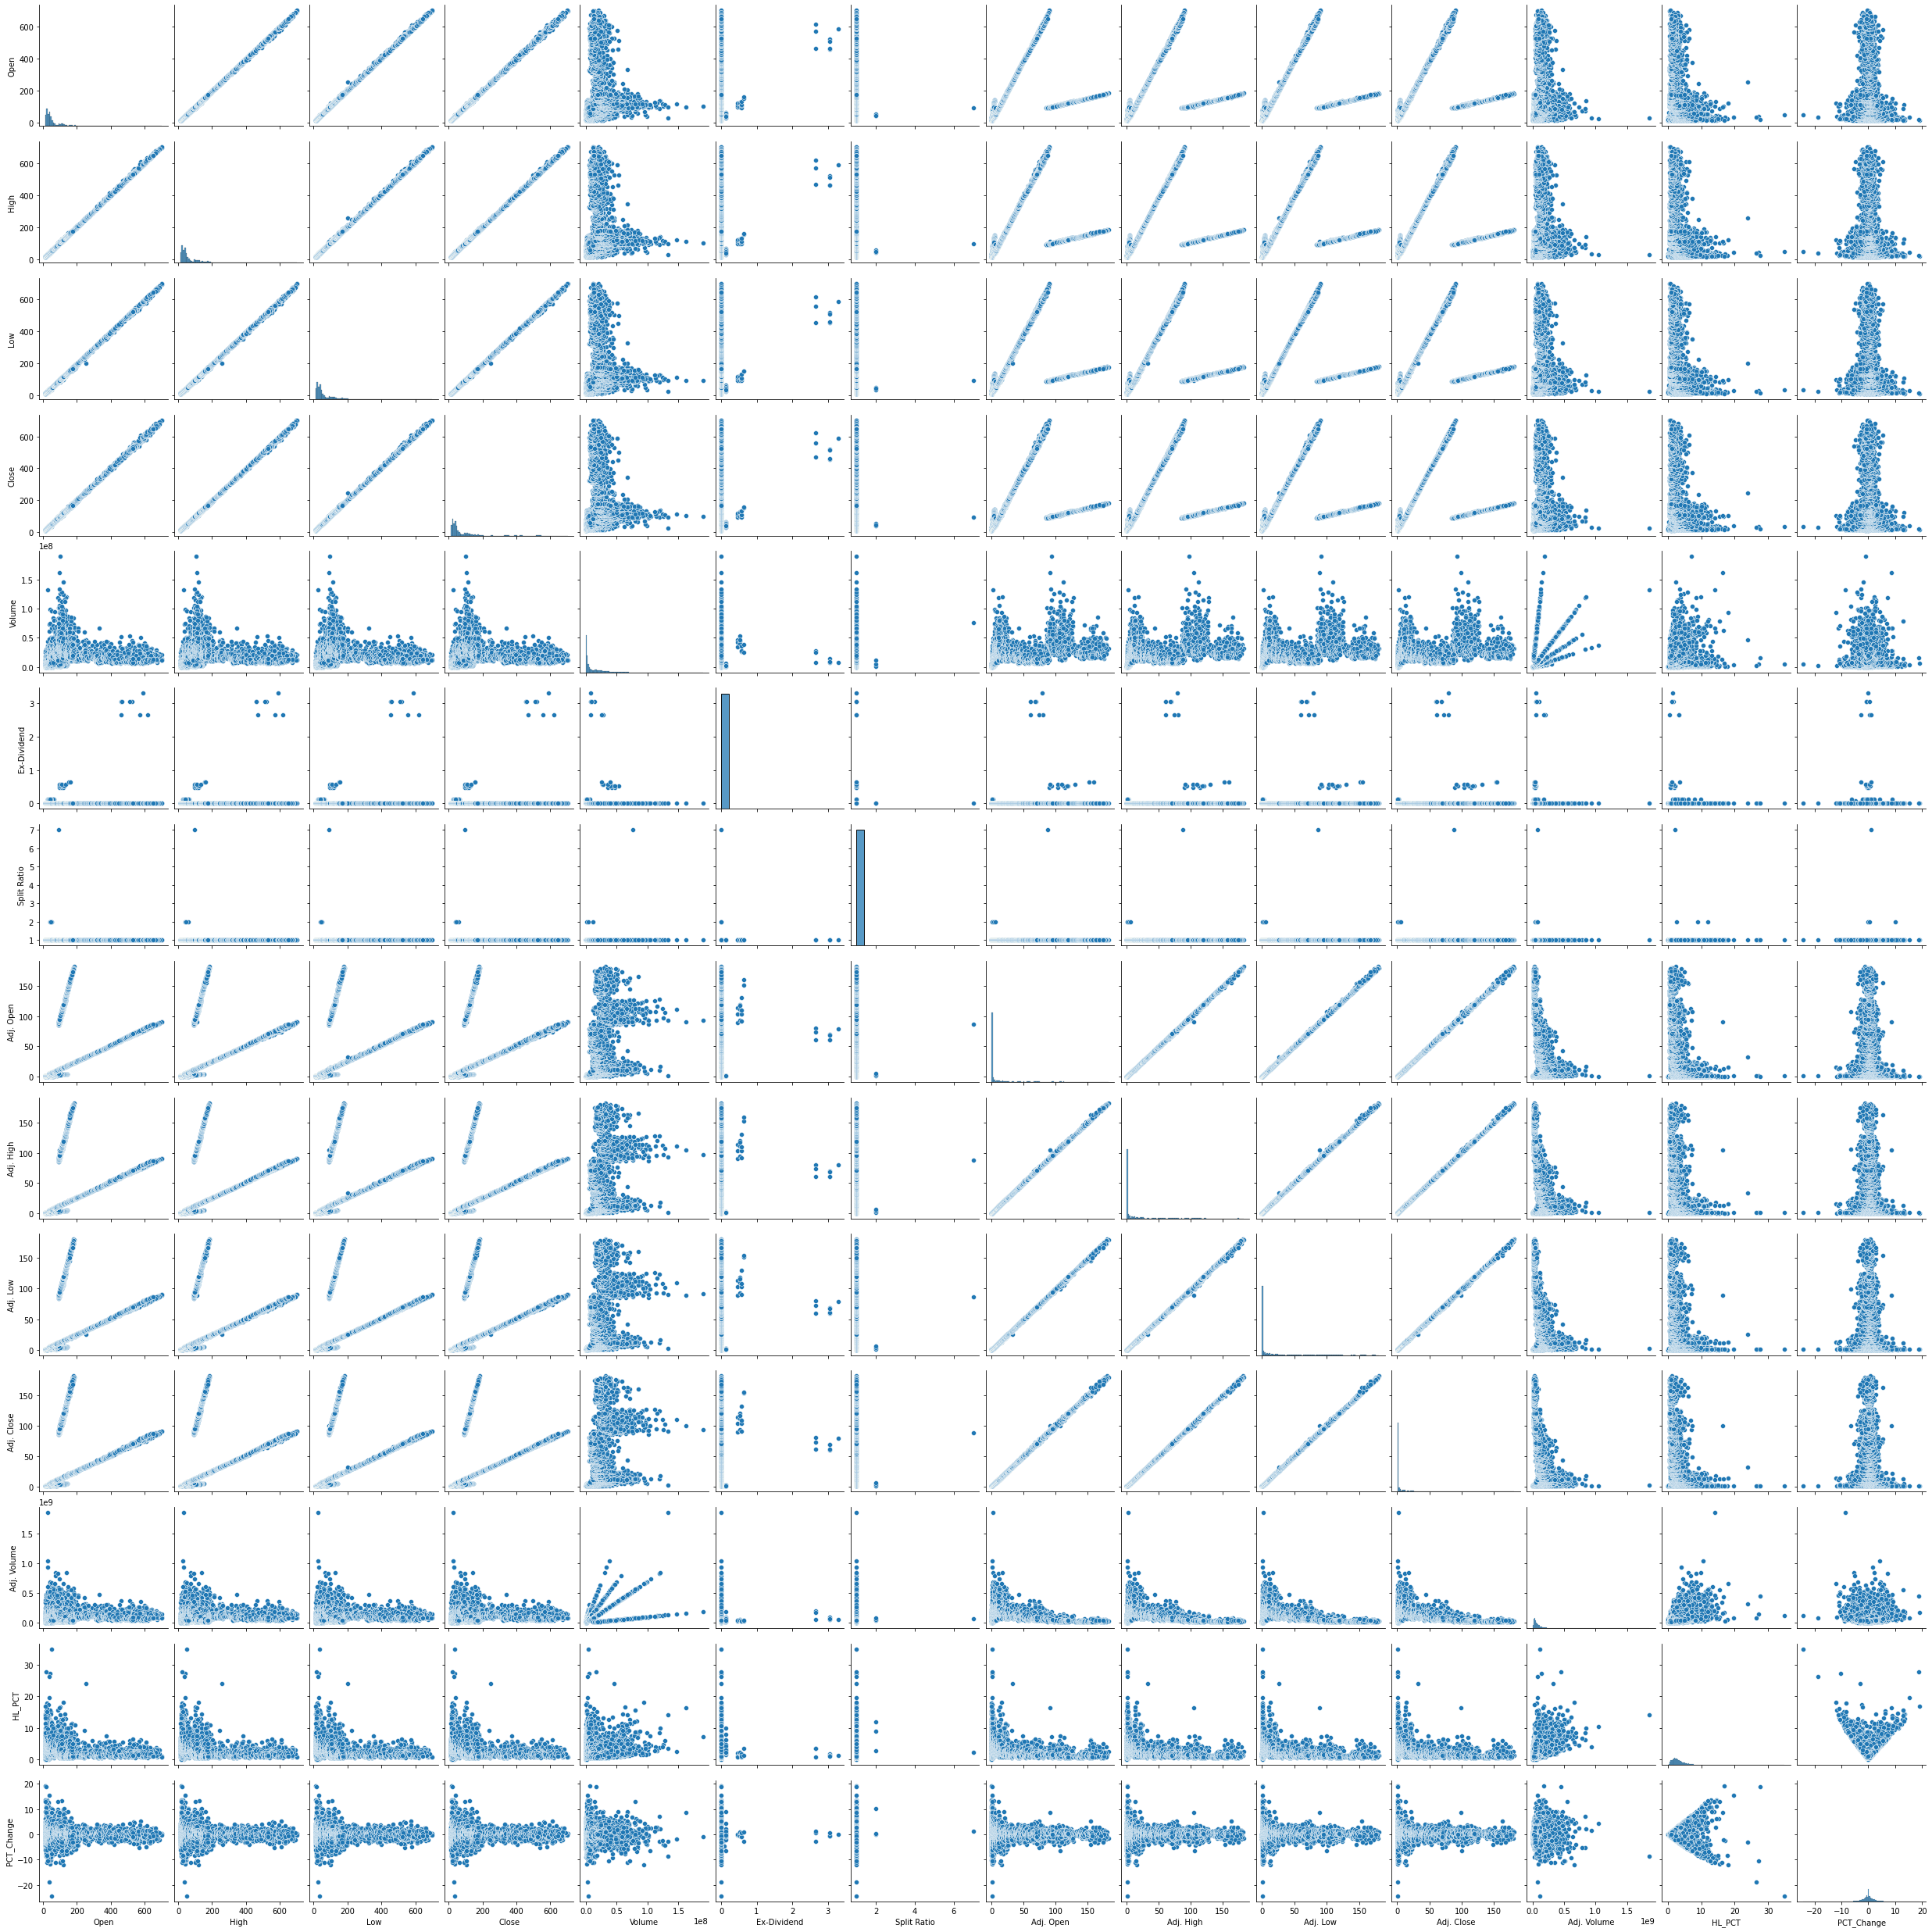

In [ ]:
#  visualizing the correlation to find the important features

sns.pairplot(df)

In [ ]:
# removing redundant features and extracting useful features into other dataframe

stock_data = df.filter(['Adj. Close', 'HL_PCT', 'PCT_Change'], axis=1)
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9400 entries, 1980-12-12 to 2018-03-27
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Adj. Close  9400 non-null   float64
 1   HL_PCT      9400 non-null   float64
 2   PCT_Change  9400 non-null   float64
dtypes: float64(3)
memory usage: 293.8 KB


In [ ]:
# segregating labels

label = 'Adj. Close'

In [ ]:
stock_data.fillna(-9999, inplace=True)                  # filling out null values if any and processing
forecast_out = int(math.ceil(0.01 * len(stock_data)))            # taking 1% of total data for future prediction
stock_data['label'] = stock_data[label].shift(-forecast_out)     # creating labels
stock_data.dropna(inplace=True)
stock_data.head()

,Adj. Close,HL_PCT,PCT_Change,label
Date,,,,
1980-12-12,0.422706,0.417391,0.000000,0.409914
1980-12-15,0.400652,0.477064,-0.474799,0.417266
1980-12-16,0.371246,0.475248,-0.473000,0.417266
1980-12-17,0.380362,0.502513,0.000000,0.415355
1980-12-18,0.391536,0.450620,0.000000,0.413443


In [ ]:
# seperating input and output variables

X = np.array(stock_data.drop(['label'], axis=1))
y = np.array(stock_data['label'])

In [ ]:
# normalizing data for Linear Regression

from sklearn import preprocessing

X = preprocessing.scale(X)
y = np.array(stock_data['label'])

print(len(X), len(y))

9306 9306


In [ ]:
# splitting training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
# training the model

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
# calculating accuracy

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

34.133632790465